## 逆関数法(指数分布)

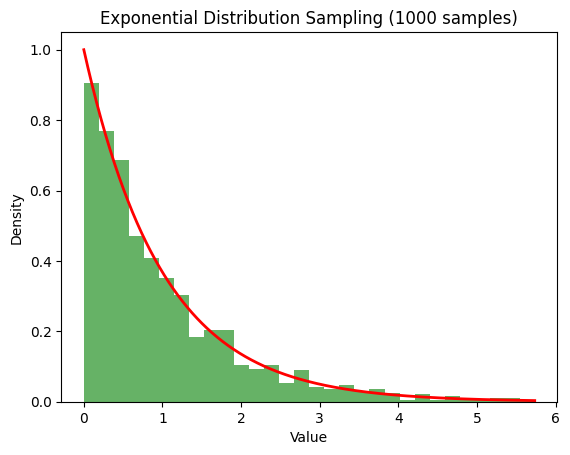

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def sample_exponential(lambda_param, num_samples):
    # 均一分布からサンプリング
    uniform_samples = np.random.uniform(0, 1, num_samples)
    
    # 変換して指数分布のサンプルを生成
    exponential_samples = -np.log(1 - uniform_samples) / lambda_param
    
    return exponential_samples

# パラメータ設定
lambda_param = 1.0
num_samples = 1000

# サンプリング
samples = sample_exponential(lambda_param, num_samples)

# 結果のプロット
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# 理論的な指数分布のプロット
x = np.linspace(0, max(samples), 1000)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, 'r-', lw=2)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Exponential Distribution Sampling (1000 samples)')
plt.show()

## 逆関数法(コーシー分布)

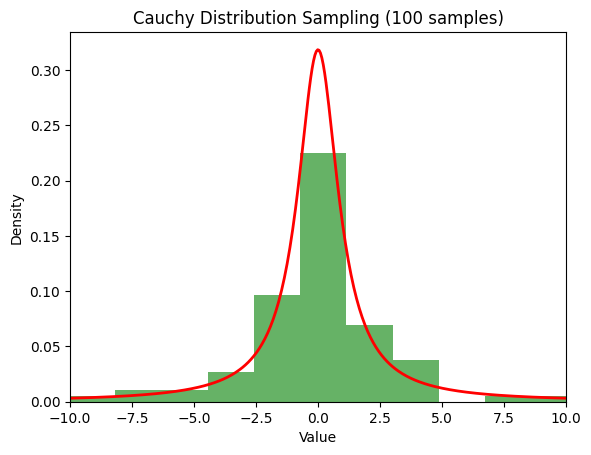

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def sample_cauchy(num_samples):
    # 均一分布からサンプリング
    uniform_samples = np.random.uniform(0, 1, num_samples)
    
    # 変換してコーシー分布のサンプルを生成
    cauchy_samples = np.tan(np.pi * (uniform_samples - 0.5))
    
    return cauchy_samples

# サンプル数の設定
num_samples = 100

# サンプリング
samples = sample_cauchy(num_samples)

# 結果のプロット
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# 理論的なコーシー分布のプロット
x = np.linspace(min(samples), max(samples), num_samples*10)
pdf = 1 / (np.pi * (1 + x**2))
plt.plot(x, pdf, 'r-', lw=2)

plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(-10, 10)
plt.title('Cauchy Distribution Sampling (100 samples)')
plt.show()

## 棄却サンプリング(一様分布からガウシアン)

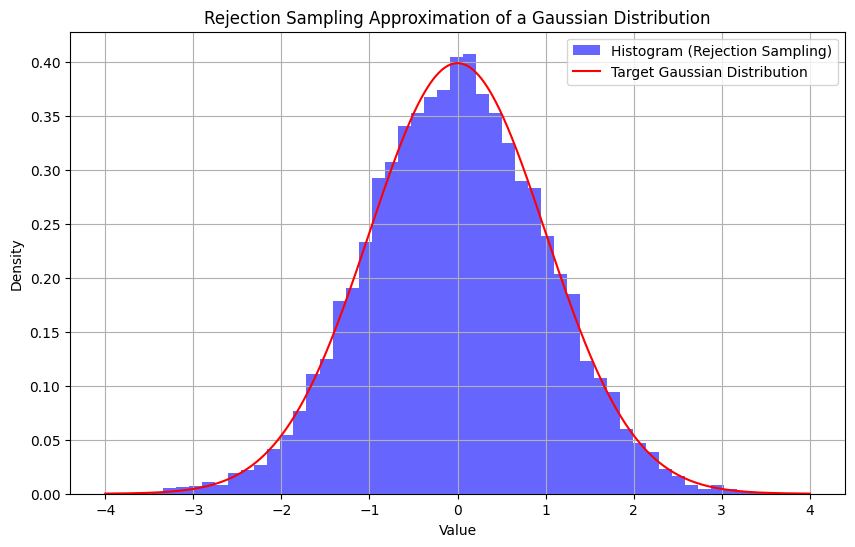

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mean = 0
std_dev = 1
num_samples = 10000

# Define the target distribution: Gaussian
def target_distribution(x):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Proposal distribution: Uniform
proposal_lower = -4
proposal_upper = 4
proposal_height = 0.4  # Chosen to cover the peak of the Gaussian

# Rejection sampling
samples = []
while len(samples) < num_samples:
    x = np.random.uniform(proposal_lower, proposal_upper)
    u = np.random.uniform(0, proposal_height)
    if u < target_distribution(x):
        samples.append(x)

# Plot the histogram and the Gaussian curve
x_vals = np.linspace(-4, 4, 1000)
gaussian_vals = target_distribution(x_vals)

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='blue', label='Histogram (Rejection Sampling)')
plt.plot(x_vals, gaussian_vals, 'r-', label='Target Gaussian Distribution')
plt.title('Rejection Sampling Approximation of a Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


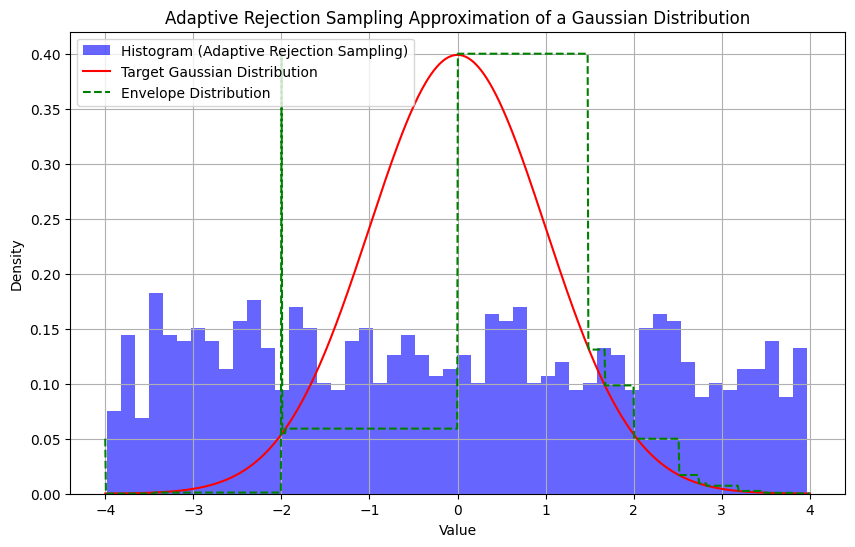

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mean = 0
std_dev = 1
num_samples = 1000

# Define the target distribution: Gaussian
def target_distribution(x):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Adaptive proposal distribution: Piecewise linear envelope
def proposal_distribution(x, segments):
    for (a, b, height) in segments:
        if a <= x < b:
            return height
    return 0

# Define initial segments for the piecewise linear envelope
segments = [(-4, -2, 0.05), (-2, 0, 0.4), (0, 2, 0.4), (2, 4, 0.05)]

# Rejection sampling with adaptive envelope
samples = []
while len(samples) < num_samples:
    x = np.random.uniform(-4, 4)
    u = np.random.uniform(0, max(height for _, _, height in segments))
    if u < target_distribution(x) / proposal_distribution(x, segments):
        samples.append(x)
    else:
        # Add a new segment to better cover the target distribution
        new_height = target_distribution(x)
        for i, (a, b, height) in enumerate(segments):
            if a <= x < b:
                segments[i] = (a, x, height)
                segments.insert(i + 1, (x, b, new_height))
                break

# Plot the histogram, the Gaussian curve, and the envelope
x_vals = np.linspace(-4, 4, 1000)
gaussian_vals = target_distribution(x_vals)
envelope_vals = np.array([proposal_distribution(x, segments) for x in x_vals])

plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='blue', label='Histogram (Adaptive Rejection Sampling)')
plt.plot(x_vals, gaussian_vals, 'r-', label='Target Gaussian Distribution')
plt.plot(x_vals, envelope_vals, 'g--', label='Envelope Distribution')
plt.title('Adaptive Rejection Sampling Approximation of a Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()